# Regression

- predicting a continous variable

In [2]:
%load_ext autoreload
%autoreload 2

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data

* dosage
* speed

In [41]:
# Generate synthetic data
np.random.seed(42)
dosages = np.linspace(0, 100, 100).reshape(-1, 1)
effectiveness = 0.8 * dosages + 20 + np.random.normal(0, 10, (100, 1))

In [42]:
df = pd.DataFrame({"dosage": dosages.flatten(), "effectiveness": effectiveness.flatten()})
df.sample(10)

,dosage,effectiveness
30,30.303030,38.225358
56,56.565657,56.860350
13,13.131313,11.372248
41,41.414141,54.844996
7,7.070707,33.330913
20,20.202020,50.818104
95,95.959596,82.132527
3,3.030303,37.654541
48,48.484848,62.224062
14,14.141414,14.063953


mean: 58.96153482605907
std: 25.515345402785016


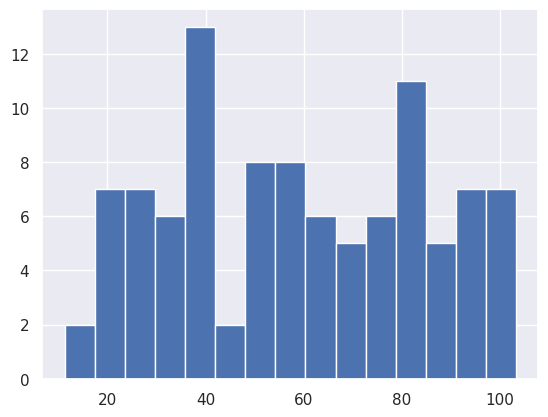

In [43]:
df.effectiveness.hist(bins=15)
print("mean:", df.effectiveness.mean())
print("std:", df.effectiveness.std())


Text(0, 0.5, 'effectiveness')

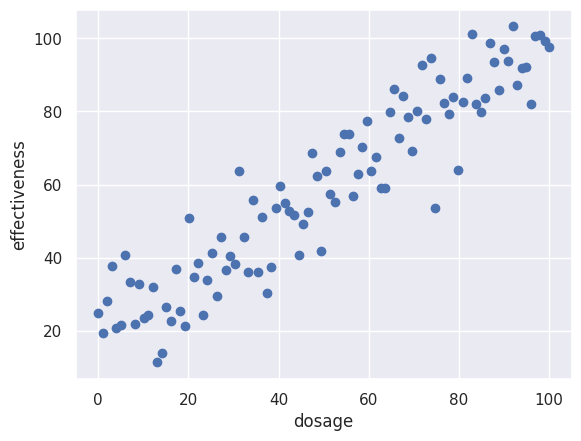

In [44]:
plt.scatter(dosages, effectiveness, label='Training Data');
plt.xlabel("dosage")
plt.ylabel("effectiveness")

# Train Test Split

![train_test_split](../static/4_train-test-split.jpg)

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(dosages, effectiveness, test_size=0.2)

LinearRegression()

In [50]:
X_train[:5], y_train[:5]

(array([[14.14141414],
        [55.55555556],
        [82.82828283],
        [76.76767677],
        [38.38383838]]),
 array([[ 14.06395299],
        [ 73.75724564],
        [101.04156671],
        [ 82.2846121 ],
        [ 37.42521022]]))

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

# Train Model

- OLS

$$\hat{y}(x) = \beta_0 + \beta_1 \cdot x + \epsilon$$

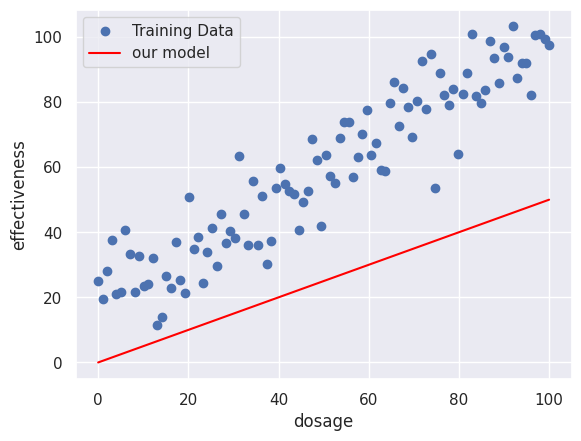

In [63]:
b_0 = 0
b_1 = 0.5
y_hat = lambda x: b_0 + b_1 * x

plt.scatter(dosages, effectiveness, label='Training Data');
plt.plot(dosages, y_hat(dosages), color="red", label="our model")
plt.xlabel("dosage")
plt.ylabel("effectiveness")
plt.legend();

OLS

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

![rss](../static/rss.png)

In [64]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

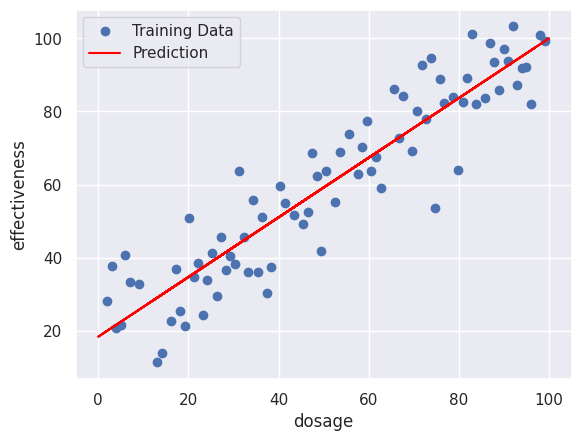

In [65]:
# Predict and visualize
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Prediction')
plt.xlabel('dosage')
plt.ylabel('effectiveness')
plt.legend()
plt.show()

In [66]:
print(f"Model equation: Effectiveness = {model.coef_[0][0]:.2f}*dosage + {model.intercept_[0]:.2f}")

Model equation: Effectiveness = 0.82*dosage + 18.39


Let's check our test set!

In [72]:
y_pred = model.predict(X_test)
pd.DataFrame({"y_test": y_test.flatten(), "y_pred": y_pred.flatten()}).head(5)

,y_test,y_pred
0,58.947025,70.310354
1,24.231591,27.457497
2,56.860350,64.541701
3,79.793852,87.616316
4,97.654129,99.977717


# Model Metrics

In [73]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9400021084697008

# Next steps

* multi linear regression
* polynomial regression
* multilevel models